<a href="https://colab.research.google.com/github/FaustinoAndres/random_walk/blob/main/Tarea_1_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 1 - Random Walk
###Nombre: Faustino Correa Muñoz
###Rol: 201241502-0

 Haga un código (ojalá en Python) que modele la siguiente situación: en un dominio que va desde $-\infty$ a $\infty$ (por supuesto, no es realmente infinito en el computador), ponga N partículas en el origen y déjelas evolucionar según *random walk*:

> Bloque con sangría



$x(n+1) = \left\{ \begin{array}{lcc}
             x(n) + 1  &   con  & p = 0.5 \\
             \\ x(n) - 1 &  con & p = 0.5
             \end{array}
   \right.$

donde $x$ es la posición, $p$ la probabilidad y $n$ el número de pasos. Realice la simulación $M$ veces y evalúe el promedio de número de partículas en cada ubicación para diferentes pasos $n$ ¿Ve una distribución Gausseana? Indique la desviación standard de distribución Gausseana que mejor se ajusta ¿Coincide con lo que vimos teóricamente? Recuerde: $\sigma^{2}_{r} = l^{2} \cdot \sigma^{2}_{m} = l^{2}n$, donde $m$ es la diferencia de pasos hacia la izquierda y derecha. Para su simulación, use pasos discretos en el espacio con $l=1$ ($x$ es un entero).

**Abstract**

En este trabajo se muestra la relación entre un modelo simple unidimensional de "random walk" y su relación con comportamientos macroscópicos, en particular con el mecanismo de difusión.
A partir de la evolución de N partículas mediante Random walk en un tienmpo T, se realizan M simulaciones diferentes para hacer un promedio y atenuar las fluctuaciones (tener más riqueza estadística). Demostraremos que se llega a una distribución Gausseana, tal como la solución analítica.

**Introducción**

En 1827 el botánico Robert Brown, usando un microscopio descubrió que una partícula de polen suspendida en agua, tiene un comportamiento caótico, el cual se conoce como movimiento browniano. El trabajo de Einstein sobre el movimiento browniano entregó resultados que podían ser medidos y ser una prueba suficiente para demostrar la existencia de los átomos.

En este caso, usaremos un modelo unidimensional de random walk para enlazar el mundo microscópico con la difusión de un fluido, que corresponde al mundo macroscópico


**Metodología**

En primer lugar importaremos las librerías y paquetes necesarios para trabajar con simulaciones computacionales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

Para reciclar código se utilizaremos una clase llamada `Particles`, la cual creará un conjunto de $N$ partículas que evolucionaran en un tiempo $T$. Los datos son almacenados en una matriz de tamaño $T \times N$.

Esta clase conta de los siguientes métodos:

- `initial_conditions`:  Las condiciones iniciales representan la primera fila de la matrix de posiciones `x`, donde la mitad de las partículas inician desde la posición $x=0$ y la segunda mitad desde la posición $x=1$. Esto para evitar que las partículas solo esten en números pares o impares en un mismo instante de tiempo, con estas condiciones tendremos la mitad de las partículas en números pares y la segunda de números impares.

- `random_walk`: este método genera una matriz de números aleatorios, escogidos del cinjunto $\{-1, 1\}$ con [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html). Posteriormente vamos recorriendo por cada paso de tiempo y actualizando las posiciones. Se utiliza `numpy.random` por sobre la librería estándar `random` de python por su rendimiento. Después de que este método es ejecutado, tendremos la posición de cada una de las partículas en por cada paso de tiempo.

- `density_random_walk`: este método surge de la necesidad de cuantificar cuantas partículas se encuentran en la misma posición por cada paso de tiempo. Para ello se crea un diccionarios que sus claves son las posiciones y su valor se va actualizando por cada repetición por cada paso de tiempo, estas son almacenadas en una lista. El resultado es una lista de largo $T$, que cada uno de sus elementos son diccionarios del tipo `{position: number of particles}`.

In [ ]:
class Particles():
  def __init__(self, N, T):
    self.N = N
    self.T = T
    self.x = np.zeros((self.T, self.N), dtype=int)
    self.t = 0
    self.density = []
    self.X = []
    self.Y = []
    self.random = [-1, 1]

  def initial_conditions(self):
    n = int(self.N/2)
    self.x[0, :n] = 1

  def random_walk(self):
    rd_walk = np.random.choice(self.random, ((self.T-1, self.N)))
    for t in range(1, self.T):
      self.x[t, :] = self.x[t-1, :] + rd_walk[t-1, :]

  def density_random_walk(self):
    for t in range(self.T):
      density = {}
      for x in self.x[t, :]:
        if x not in density:
          density[x] = 1
        else:
          density[x] = density[x] + 1
      self.density.append(density)


Para probar este código generamos un conjunto de partículas llamada particles, que tendrá 5 partículas ($N=5$) que evolucionan durante 50 pasos de tiempo ($T=50$). Posteriormente graficaremos los resultados para visualizar como se comportan estás partículas.

In [ ]:
particles = Particles(N = 5, T = 50)
particles.initial_conditions()
particles.random_walk()

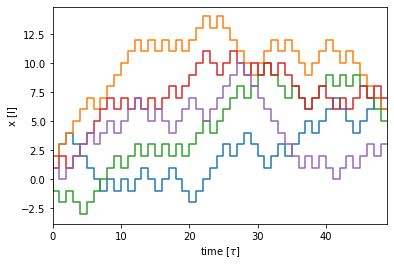

In [ ]:
t_0 = np.array([t for t in range(50)])
for i in range(5):
  plt.step(t_0, particles.x[:, i])
plt.xlim([t_0[0], t_0[-1]])
plt.xlabel(r'time [$\tau$]')
plt.ylabel(r'x [l]')
plt.show()

Con esto en mente

In [ ]:
particles.density_random_walk()

Como no es suficiente solo usar un conjunto de partículas, se crea una clase llamada `Ensemble`, donde contendrá $M$ subconjunto de $N$ partículas, la cual consiste en generar $M$ simulaciones diferentes usando la clase `Particles`. El método simulation realiza las $M$ simulaciones de cada conjunto de partículas y son agregadas a la propiedad llamada `ensemble` (su tipo de dato es `list`).

In [ ]:
class Ensemble():

  def __init__(self, M, N, T):
    self.M = M
    self.N = N
    self.T = T
    self.ensemble = []

  def simulation(self):

    for _ in range(self.M):
        particles = Particles(self.N, self.T)
        particles.initial_conditions()
        particles.random_walk()
        particles.density_random_walk()
        self.ensemble.append(particles)




Generamos 100 conjuntos de 500 partículas que evolucionan según random walk. Los resultados finales son promediados y s

In [ ]:
M = 100
N = 500
T = 5000
ensemble = Ensemble(M,N,T)

In [ ]:
ensemble.simulation()

In [ ]:
print(ensemble)

Una vez que la simulación es realizada, procederemos a unificar todos los resultados, es decir, totas las partículas con sus posiciones durante cada paso de tiempo, y crear una lista llamada `density_total`, que contenga toda la información del ensemble. La función merge genera `density_total` como una lista de $T$ elementos (el número de pasos en el tiempo) donde cada elemento es un diccionario vacío. Mientras recorremos en el tiempo, y por cada tiempo, las partículas del ensemble (recorremos cada conjunto de partículas), vamos completando cada diccionario con la posición alcanzada como clave y la cantidad de partículas como su valor. Es claro que para $T=0$, tendremos un dicionario del tipo `{0: N*M/2, 1:N*M/2}`, esto quiere decir que para las condiciones iniciales tenemos la mitad de las partículas en $x=0$ y la segunda mitad en $x=1$. El diccionario por cad paso de tiempo irá teniendo más elementos del tipo clave valor, por la evolución según random walk de todas las partículas.

In [ ]:
density_total = [{} for _ in range(T)]

def merge(particle):
  for t in range(particle.T):
    for k, v in particle.density[t].items():

      if k not in density_total[t]:
        density_total[t][k] = v
      else:
        density_total[t][k] = density_total[t][k] + v

      #print(k, v)

for particle in ensemble.ensemble:
  merge(particle)

print(density_total[0])

{1: 25000, 0: 25000}


El código de la celda siguiente genera dos listas ($X$ e $Y$) de $T$ elementos que corresponden a listas vacías. $X$ e $Y$ estas listas son usadas para graficar los resultados finales, $X$ contendrá las posiciones e $Y$ el promedio de partículas (es decir dividiremos por $M$ la cantidad de partículas que estén asociadas a esa posición).

In [ ]:
 X = [[] for _ in range(T)]
 Y = [[] for _ in range(T)]

for t in range(T):

  for k, v in density_total[t].items():
    X[t].append(k)
    Y[t].append(v/M)



Elegimos solo algunos tiempo para ver la evolución del ensemble. Se puede notar que corresponde a una curva gaussiana que va decayendo a través del tiempo

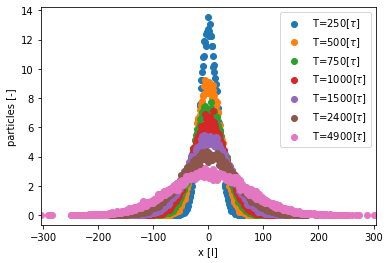

In [ ]:
plt.scatter(X[250], Y[250], label=r"T=250[$\tau$]")
plt.scatter(X[500], Y[500], label=r"T=500[$\tau$]")
plt.scatter(X[750], Y[750], label=r"T=750[$\tau$]")
plt.scatter(X[1000], Y[1000], label=r"T=1000[$\tau$]")
plt.scatter(X[1500], Y[1500], label=r"T=1500[$\tau$]")
plt.scatter(X[2400], Y[2400], label=r"T=2400[$\tau$]")
plt.scatter(X[4900], Y[4900], label=r"T=4900[$\tau$]")
plt.xlim([min(X[4900]), -min(X[4900])])
plt.legend()
plt.xlabel(r'x [l]')
plt.ylabel(r'particles [-]')
plt.show()

De momento, nuestras curvas tienen forma de campana de Gauss, pero ¿realmente es así?, para ello haremos un ajuste de curva usando curve_fit, para ellos necesitamos una función objetivo, que será la función de Green para la ecuación de difusión es:



$C(x, t) = \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{|x-x_{0}|^2}{4 D t}}$

In [ ]:
import math
def green_function(x, x_0, D):
    return 1./math.sqrt(4*math.pi*time)*np.exp(-(x-x_0)**2/(4*D*time))

Es una función que evoluciona en el tiempo, por lo que haremos un ajuste de curva para cada paso de tiempo, y obtendremos las constantes del problema: $D$ y $x_0$, donde $D$ es la constante de difusión y $x_0$ es la media de las posiciones.

In [ ]:
times = [t for t in range(500, T)]
D = []
std = []

for time in times:
  x = np.array(X[time])
  y = np.array(Y[time])
  res, cov = curve_fit(green_function, x, y)
  D.append(res[1])
  std.append(math.sqrt(2*time*D[-1]))


Obtendremos un $D$ diferente por cada paso de tiempo, el cual graficaremos

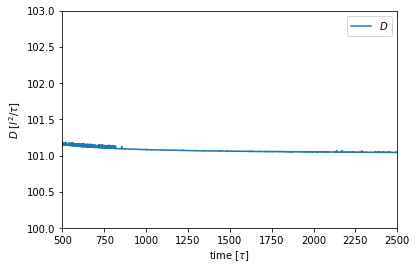

In [ ]:
plt.plot(times, D, label=r"$D$")
plt.ylim([100.0, 103.0])
plt.xlim([times[0], 2500])
plt.legend()
plt.xlabel(r'time [$\tau$]')
plt.ylabel(r'$D$ [$l^2/\tau$]')
plt.show()

Se puede apreciar que $D\approx 101 \:  l^2/\tau$. Si consideramos que los saltos en el espacio son de 1 angstrom y con frecuencia de 1 [$ns$], el valor de $D_{1}$ es 101 $A^2/\mu s$. Si consideramos que $\tau=1 ps$, entonces el nuevo coeficiente $D_{2}=101 A^2/ps $ es 1000 veces mayor a $D_{1}$ ($D_2 = 1000D_{1}$).

Podemos notar que la desviación estándar $\sigma$ aumenta a medida que pasa el tiempo. Esta desviación evoluciona según $\propto \sqrt{t}$. En la figura siguiente se puede apreciar la curva de la desviación estándar frente a la curva $\sqrt{t\cdot N}$

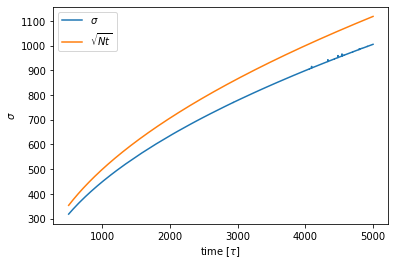

In [ ]:
b = [math.sqrt(t*N/2) for t in times]
plt.plot(times, std, label=r"$\sigma$")
plt.plot(times, b, label=r"$\sqrt{Nt}$")
plt.legend()
plt.xlabel(r"time [$\tau$]")
plt.ylabel(r"$\sigma$")
plt.show()


**Conclusión**

Se realizó una simulación de random walk, considerando $M=100$ conjuntos de $N=500$ partículas para un tiempo de simulación completo de $T=5000 \tau$. Pudimos notar que a partir de un sistema microscópico se puede obtener resultados medibles a macro escala, en este caso particular el coeficiente de difusión $D$. Esto quiere decir que el mecanismo de difusión es intrínsicamente un fenómeno molecular.

Además se puede apreciar que la concentración de partículas corresponde a una distribución gaussiana que evoluciona según la ecuación de Green (la cual es una solución para la ecuación de difusión) a medida que pasa el tiempo. Para cada paso de tiempo se realiza un ajuste de la curva, obteniendo como parámetros del problema $D$ y $x_0$. El valor de D a medida que pasa el tiempo se mantiene prácticamente constante $101 \:  l^2/\tau$, como es de esperar una vez establecido los parámetros del problema, este no es dependiente del tiempo. Considerando un salto característico de $1 A$ con frecuencia $1ns$ el valor de $D$ es $101 A^2/ns$. Si consideramos que la frecuencia aumenta a $1 ps$, el coeficiente de difusión aumenta en un factor de 1000, esto debido a que las partículas se mueven más rápido y podrán

Para simulaciones moleculares se puede computar $D$ a partir de la diferencia de posiciones llamada mean square displacement (MSD), según la relación $<(X(t)-X(0))^2> = 2 D t$.